# Comparing Classifiers for Building Classification Models

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be comparing the performance of different classifiers for building classification models.

## 1. Make synthetic dataset

### 1.1. Import library

In [1]:
from sklearn.datasets import make_classification

### 1.2. Generate the dataset

In [2]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

### 1.3. Let's examine the data dimension

In [3]:
X.shape #1000 rows 5 columns

(1000, 5)

In [4]:
Y.shape #1000 samples, one column

(1000,)

## 2. Data split (80/20 ratio)

### 2.1. Import library

In [5]:
from sklearn.model_selection import train_test_split

### 2.2. Data split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 2.3. Let's examine the data dimension

In [7]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [8]:
X_test.shape, Y_test.shape

((200, 5), (200,))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### 3.1. Import modules

In [9]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### 3.2. Defining learning classifiers

In [10]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### 3.3. Build Model, Apply Model on Test Data & Record Accuracy Scores

In [11]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)
# iterate over classifiers

In [12]:
scores

[0.85,
 0.85,
 0.845,
 0.82,
 0.845,
 0.82,
 0.85,
 0.85,
 0.855,
 0.85,
 0.85,
 0.85,
 0.845,
 0.8]

## 4. Analysis of Model Performance

### 4.1. Import library

In [13]:
import pandas as pd
import seaborn as sns

### 4.2. Create data frame of *model performance*

In [14]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.850
1,Linear_SVM,0.850
2,Polynomial_SVM,0.845
3,RBF_SVM,0.820
4,Gaussian_Process,0.845
5,Gradient_Boosting,0.820
6,Decision_Tree,0.850
7,Extra_Trees,0.850
8,Random_Forest,0.855
9,Neural_Net,0.850


### 4.3. Adding colors to the data frame

In [15]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.850000
1,Linear_SVM,0.850000
2,Polynomial_SVM,0.845000
3,RBF_SVM,0.820000
4,Gaussian_Process,0.845000
5,Gradient_Boosting,0.820000
6,Decision_Tree,0.850000
7,Extra_Trees,0.850000
8,Random_Forest,0.855000
9,Neural_Net,0.850000


### 4.4. Bar plot of model performance

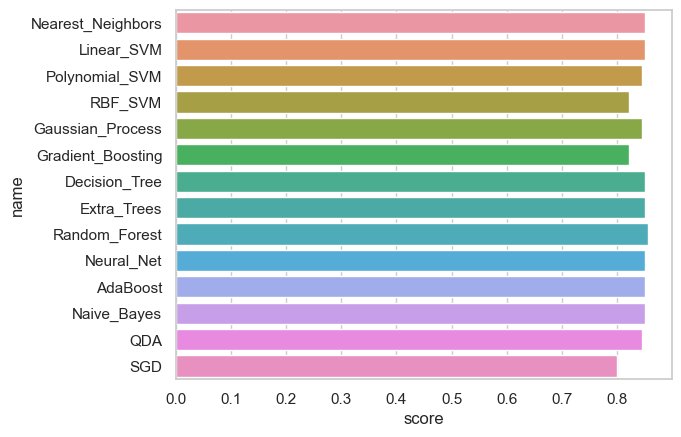

In [16]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

---